<a href="https://colab.research.google.com/github/bilalsarimeseli/Data_Science_For_Science/blob/main/Data_Science_for_Science(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris(as_frame= True) #Returns a dictionary-like object
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris.DESCR # A lot of unparsed characters, so let's print it instead in the below cell

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [ ]:
print(iris.DESCR) #Much cleaner and more organized

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.data #It is a data frame where each row is a different iris (INSTANCE), each column a feature
#4-dimensional feature space (4D VECTOR)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>

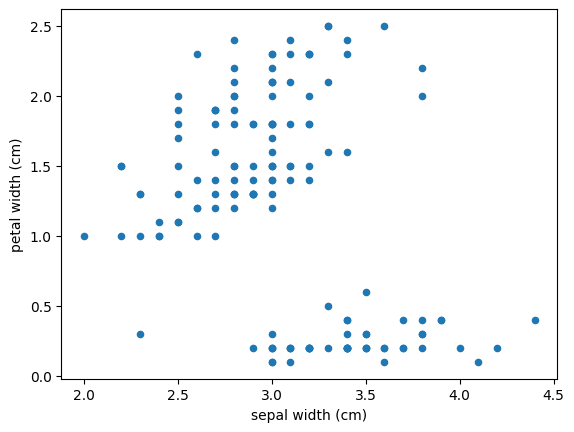

In [ ]:
#A Projection of the feature space onto a 2D sub-space
iris.data.plot(kind = 'scatter', x = 1, y = 3)  # 1 & 3 refer to columns/features

<Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>

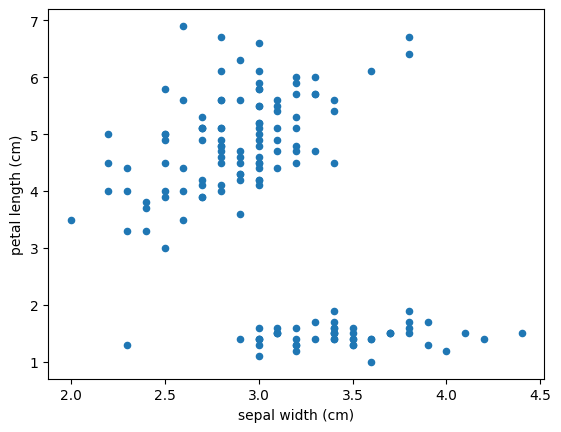

In [ ]:
#Another projection of the feature space onto a 2D sub-space
iris.data.plot(kind = 'scatter', x = 1, y = 2)  # 1 & 2 refer to columns/features

In [ ]:
iris.target #Targets are usually denoted as 'y', the output vector/matrix

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#Let's get qualitative data from Iris dataset.
#We will need to use one-hot encoding to assign numerical values to qualitative features (No directionality)

#Let's add fake data
import numpy as np
X = iris.data
X['Season'] = np.random.randint(0,4,150) #We generate 150 random integers from [0,1,2,3]

In [ ]:
SeasonDict = {0 : "Winter", 1: "Spring", 2:"Summer", 3: "Fall"}
X['Season'] = X.Season.replace(SeasonDict) #Replaces numbers with words from SeasonDict
X.head() #We see that we have Season column populated with random seasons.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Season
0,5.1,3.5,1.4,0.2,Winter
1,4.9,3.0,1.4,0.2,Fall
2,4.7,3.2,1.3,0.2,Fall
3,4.6,3.1,1.5,0.2,Summer
4,5.0,3.6,1.4,0.2,Spring


In [ ]:
pd.get_dummies(X.Season)  #Create dummy variables for the 'Season' column in the DataFrame X

,Fall,Spring,Summer,Winter
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
145,0,0,1,0
146,0,0,1,0
147,0,1,0,0
148,0,0,1,0


In [ ]:
# Join the DataFrame X with the one-hot encoded columns for the 'Season' variable
# Drop the original 'Season' column (axis = 1) since it has been replaced by its one-hot encoded representation
X = X.join(pd.get_dummies(X.Season)).drop('Season', axis = 1)

In [ ]:
X #Our features space is 8 dimensional.
#We could also drop one of the seasons due to colinearity.
#Dropping one column doesn't necessarily mean losing information
#as the dropped column's information is implicitly captured by the other columns.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Fall,Spring,Summer,Winter
0,5.1,3.5,1.4,0.2,0,0,0,1
1,4.9,3.0,1.4,0.2,1,0,0,0
2,4.7,3.2,1.3,0.2,1,0,0,0
3,4.6,3.1,1.5,0.2,0,0,1,0
4,5.0,3.6,1.4,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1,0
146,6.3,2.5,5.0,1.9,0,0,1,0
147,6.5,3.0,5.2,2.0,0,1,0,0
148,6.2,3.4,5.4,2.3,0,0,1,0


# DATA PROCESSING TECHNIQUES
## **1) Data Cleaning**
a) _Missing Data_

b) _Noisy data_: removing outliers

c) _Explanations_: Bad equipment, faulty trials.

**Note:** You can get more information about [data cleaning](https://medium.com/sciforce/data-cleaning-and-preprocessing-for-beginners-25748ee00743) here.

## **1) Data Transformation**
a) _Feature Normalization_: Scale between **`1`** and **`-1`**

b) _Feature Selection_: Selecting the most important feature relavant to the output.

c) _Transform categorical variables_:
* One-hot encoding

c) _Dimensionality Reduction_:

* `Linear Discriminant Analysis` (**LDA**): Classification between events and objects, mostly used in NLP as a precursor to more advanced ML algorithms, supervised learning technique with class labels. It assumes normally distributed classes and equal covariances. It finds seperability between classes.
* `Principal Component Analysis` (**PCA**):  Identifying minor/major axis of data, used in ML pipelines as a data processing technique, unsupervised learning with no class labels. It makes no assumptions on initial dataset. It finds the axis of maximum explained variance, does not make predictions/classifications.



###**Important Reminders**
- Ensure data completeness by addressing unwanted NaN values, signifying missing entries; remove these as needed.

- Improve data quality by cleaning processes, considering removal of extreme outliers that may be noise or errors.

- Normalize and rescale data to account for varying standard deviations among numerical features.

- Prioritize essential features to streamline model performance and obtain information efficiently.

- For datasets with many features, consider dimensionality reduction techniques like PCA and LCA for simplicity and improved efficiency.

### **PRINCIPAL COMPONENT ANALYSIS (PCA)**

Most generally, it is the method of transforming data onto its most dominant set of axes and used for _Dimensionality Reduction_

We use the formula   **$Z = \frac{{\text{{value}} - \text{{mean}}}}{{\text{{Standard Deviation}}}}$** for centering the data and removing all the variance.

**Another good definition:** PCA finds a new set of dimensions (or a set of basis of views) such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them. It means more important principle
axis occurs first. (more important = more variance/more spread out data)

If data has high covariance when represented in some n number of dimensions then we replace those dimensions with linear combination of those n dimensions. Now that data will only be dependent on linear combination of those related n dimensions. (related = have high covariance)

Let's consider a simple example involving three physical measurements related to a pendulum experiment:

**Length of the Pendulum (L):** The length of the string from which the pendulum bob is suspended.

**Period of the Pendulum (T): **The time it takes for the pendulum to complete one full oscillation.

**Amplitude of the Pendulum (A):** The maximum angle the pendulum swings from its vertical position.

In this scenario, PCA can be applied to simplify the analysis and capture the essential information. The goal might be to reduce these three measurements to a smaller set of variables that still represent the key characteristics of the pendulum motion.


Please see the examples in the [page](https://setosa.io/ev/principal-component-analysis/).

- PCA can be useful for simplfying n dimensional feature spaces.
- PCA can help visualize feature spaces when **n>3**.
- Principal Component axes are not necessarily aligned with feature axes, therefore it can hard to interpret.

![image](https://numxl.com/wp-content/uploads/principal-component-analysis-pca-featured.png)


SUGGESTION:
If you want to dive deeper into PCA, please read this [article](https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0)


# **How does PCA work?**

1. Calculate the covariance matrix X of data points.
2. Calculate *eigen vectors* and corresponding eigen values.
3. Sort the *eigen vectors* according to their eigen values in decreasing order. (Learn more about [Eigenvectors](https://setosa.io/ev/eigenvectors-and-eigenvalues/))
4. Choose first **k** *eigen vectors* and that will be the new **k** dimensions.
5. Transform the original n dimensional data points into k dimensions.

To sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

How PCA contructs principal components:
![image](https://builtin.com/sites/www.builtin.com/files/inline-images/national/Principal%2520Component%2520Analysis%2520second%2520principal.gif)


Principal components are derived in a way that each component captures the **maximum possible variance** in the dataset. The first principal component corresponds to the line that, when projected onto it, spreads out the data points the most. Mathematically, it's the line that maximizes the variance, i.e., the average of squared distances from the projected points to the origin.

Principal components are successively calculated, ensuring each is uncorrelated with the previous, and accounts for the next highest variance. `This process continues until the total number of principal components matches the original variables.`

Eigenvectors and eigenvalues come in pairs, equal to the data's dimensions. Eigenvectors of the Covariance matrix represent directions of maximum variance, known as `Principal Components`, and eigenvalues indicate the amount of variance in each. By ranking eigenvectors based on eigenvalues, you determine the significance order of the principal components.


Please review this [article](https://builtin.com/data-science/step-step-explanation-principal-component-analysis) for further understanding.

# Let's now implement PCA in code

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
data = load_iris(as_frame=True)

In [ ]:
X = data.data
Y = data.target
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Common Sklearn System
**a)** Create a PCA machine

**b)** Fit the machine and run with the data

**c)** Extract insights from the machine


In [ ]:
pc_finder = PCA() #We will use this to create an instance of the Principal Component Analysis (PCA)
pc_finder.fit(X) #Run the machine with our dataset
axes = pc_finder.components_ #Extract the pc axes and store them in a variable.

axes

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [ ]:
#For large matrices, the pc axes are slowly to find precisely;
#so different approximation techniques can be used.
#pc_finder2 = PCA(svd_solver = 'randomized)

#The dot product is the sum product of vectors.
axes[0].dot(axes[1]).round() #Results 0 means they are perpendicular.

0.0

In [ ]:
#Matrix multiplication finds several dot products at once.
axes.dot(axes.T).round()

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1., -0., -0.],
       [ 0., -0.,  1., -0.],
       [ 0., -0., -0.,  1.]])

In [ ]:
# How can we extract the principal components of each iris?
# Let's take the first iris which has 4 principal components that
# explain how much of these is needed to describe it


### Using Basic Linear Algebra
We know the PCA algorithms start by centering the cloud of instance points
around the origin by subtracting feature means from each column so the pc axes cross at the origin.

In [ ]:
X.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [ ]:
demeanedX = X - X.mean()
demeanedX.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333


In [ ]:
axes.dot(demeanedX.iloc[0]) #To get the principal components of the first iris

array([-2.68412563e+00,  3.19397247e-01, -2.79148276e-02, -2.26243707e-03])

In [ ]:
#We can do all of the irises at once using matrix multiplication
components = axes.dot(demeanedX.T)
pd.DataFrame(components)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-2.684126,-2.714142,-2.888991,-2.745343,-2.728717,-2.280860,-2.820538,-2.626145,-2.886383,-2.672756,...,2.314155,1.922268,1.415236,2.563013,2.418746,1.944110,1.527167,1.764346,1.900942,1.390189
1,0.319397,-0.177001,-0.144949,-0.318299,0.326755,0.741330,-0.089461,0.163385,-0.578312,-0.113774,...,0.183651,0.409203,-0.574916,0.277863,0.304798,0.187532,-0.375317,0.078859,0.116628,-0.282661
2,-0.027915,-0.210464,0.017900,0.031559,0.090079,0.168678,0.257892,-0.021879,0.020760,-0.197633,...,0.322694,0.113587,0.296323,0.292570,0.504483,0.177825,-0.121898,0.130482,0.723252,0.362910
3,-0.002262,-0.099027,-0.019968,0.075576,0.061259,0.024201,0.048143,0.045298,0.026745,0.056295,...,-0.277654,-0.505305,0.015305,-0.057913,-0.241091,-0.426196,-0.254367,-0.137001,-0.044595,0.155039


In [ ]:
components = pc_finder.fit_transform(X)
components

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

In [ ]:
components = pd.DataFrame(components)
components.head()

,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


In [ ]:
components.columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4']
components.head()

,PC 1,PC 2,PC 3,PC 4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


<Axes: xlabel='PC 1', ylabel='PC 2'>

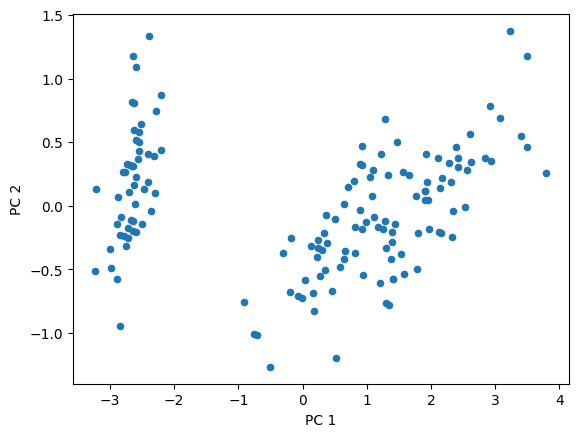

In [ ]:
#Let's visualize the data by the first two components
components.plot(kind = 'scatter', x = 'PC 1', y = 'PC 2')

In [ ]:
components['target'] = Y
components.head()

,PC 1,PC 2,PC 3,PC 4,target
0,-2.684126,0.319397,-0.027915,-0.002262,0
1,-2.714142,-0.177001,-0.210464,-0.099027,0
2,-2.888991,-0.144949,0.017900,-0.019968,0
3,-2.745343,-0.318299,0.031559,0.075576,0
4,-2.728717,0.326755,0.090079,0.061259,0


In [ ]:
#Let's plot the different colors with different targets
color_dict = {0 : 'darkorange', 1: 'seagreen', 2: 'steelblue', 3: ''}

components['target'] = components.target.replace(color_dict)
components.head()

,PC 1,PC 2,PC 3,PC 4,target
0,-2.684126,0.319397,-0.027915,-0.002262,darkorange
1,-2.714142,-0.177001,-0.210464,-0.099027,darkorange
2,-2.888991,-0.144949,0.017900,-0.019968,darkorange
3,-2.745343,-0.318299,0.031559,0.075576,darkorange
4,-2.728717,0.326755,0.090079,0.061259,darkorange


<Axes: xlabel='PC 1', ylabel='PC 2'>

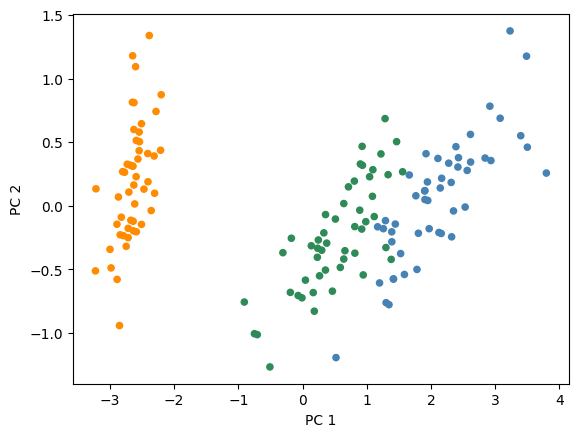

In [ ]:
components.plot(kind = 'scatter', x = 'PC 1', y = 'PC 2', color = components.target)

In [ ]:
#Means of the principal components are zero.
components.mean().round()

<ipython-input-41-150864132c8d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  components.mean().round()


PC 1   -0.0
PC 2   -0.0
PC 3   -0.0
PC 4   -0.0
dtype: float64

In [ ]:
#The importance of each principal component
pc_finder.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [ ]:
pc_finder.explained_variance_/pc_finder.explained_variance_.sum()
#Almost 90% of the variance is explained by the first component. array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
#This method gives it directly
pc_finder.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])